<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/Projeto8_semaforo_marcelounb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.1.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [0]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [7]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [0]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [10]:
y_train.shape

(34799,)

In [11]:
X_test.shape

(12630, 32, 32, 3)

In [12]:
X_validation.shape

(4410, 32, 32, 3)

1

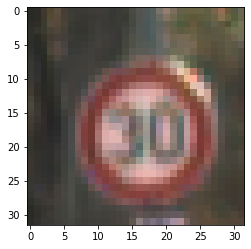

In [13]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

0

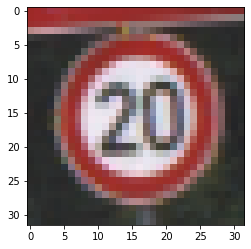

In [14]:
i = 3009
plt.imshow(X_test[i])
y_test[i]

8

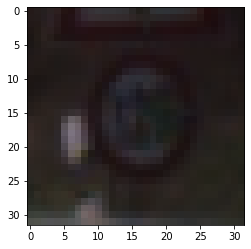

In [15]:
i = 2100
plt.imshow(X_validation[i])
y_validation[i]

In [0]:
from sklearn.utils import shuffle

In [0]:
X_train, y_train = shuffle(X_train, y_train)

In [0]:
# Transformando em escala de cinza
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [19]:
X_train_gray.shape

(34799, 32, 32, 1)

In [20]:
X_test_gray.shape

(12630, 32, 32, 1)

In [22]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [0]:
X_train_gray_norm = (X_train_gray - 128) / 128  # Normalizando para ficar entre menos um e um
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [24]:
np.max(X_train_gray_norm)

0.9921875

In [25]:
np.min(X_train_gray_norm)

-0.9713541666666666

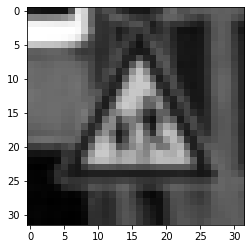

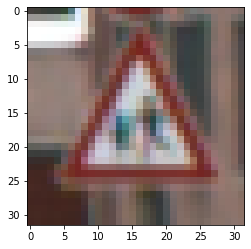

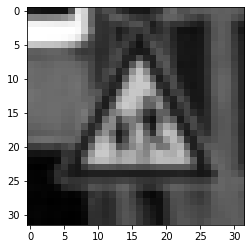

In [27]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

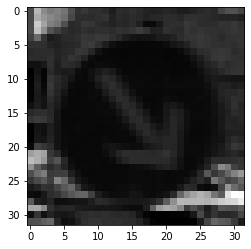

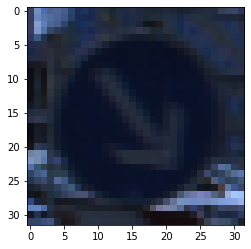

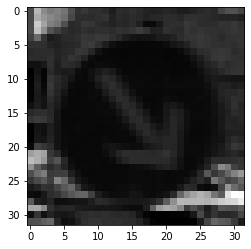

In [28]:
i = 60
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')

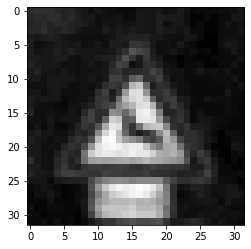

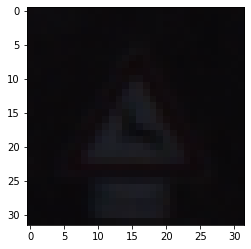

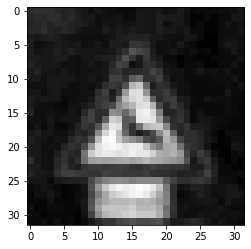

In [29]:
i = 60
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap='gray')

# Etapa 5: Criação do modelo e treinamento

STEP 1: THE FIRST CONVOLUTIONAL LAYER #1

Input = 32x32x1
Output = 28x28x6
Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
Used a 5x5 Filter with input depth of 3 and output depth of 6
Apply a RELU Activation function to the output
pooling for input, Input = 28x28x6 and Output = 14x14x6
STEP 2: THE SECOND CONVOLUTIONAL LAYER #2

Input = 14x14x6
Output = 10x10x16
Layer 2: Convolutional layer with Output = 10x10x16
Output = (Input-filter+1)/strides => 10 = 14-5+1/1
Apply a RELU Activation function to the output
Pooling with Input = 10x10x16 and Output = 5x5x16
STEP 3: FLATTENING THE NETWORK

Flatten the network with Input = 5x5x16 and Output = 400
STEP 4: FULLY CONNECTED LAYER

Layer 3: Fully Connected layer with Input = 400 and Output = 120
Apply a RELU Activation function to the output
STEP 5: ANOTHER FULLY CONNECTED LAYER

Layer 4: Fully Connected Layer with Input = 120 and Output = 84
Apply a RELU Activation function to the output
STEP 6: FULLY CONNECTED LAYER

Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [30]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))  # Retorna uma probabilidade para todas as classes

LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [32]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 16s 470us/sample - loss: 3.1790 - accuracy: 0.1824 - val_loss: 2.6889 - val_accuracy: 0.2971
Epoch 2/50
34799/34799 [==============================] - 16s 452us/sample - loss: 1.7052 - accuracy: 0.5360 - val_loss: 1.4298 - val_accuracy: 0.5848
Epoch 3/50
34799/34799 [==============================] - 16s 453us/sample - loss: 0.9757 - accuracy: 0.7265 - val_loss: 1.0309 - val_accuracy: 0.6957
Epoch 4/50
34799/34799 [==============================] - 16s 452us/sample - loss: 0.6926 - accuracy: 0.8142 - val_loss: 0.8932 - val_accuracy: 0.7417
Epoch 5/50
34799/34799 [==============================] - 16s 451us/sample - loss: 0.5485 - accuracy: 0.8544 - val_loss: 0.7430 - val_accuracy: 0.7816
Epoch 6/50
34799/34799 [==============================] - 16s 453us/sample - loss: 0.4581 - accuracy: 0.8782 - val_loss: 0.6676 - val_accuracy: 0.8036
Epoch 7/50
34799/34799 [=====================

# Etapa 6: Avaliação do modelo

In [33]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 4s 336us/sample - loss: 1.1764 - accuracy: 0.8789
Test Accuracy: 0.8788598775863647


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
val_accuracy

[0.29705215,
 0.5848073,
 0.6956916,
 0.74172336,
 0.78163266,
 0.80362815,
 0.7913832,
 0.8335601,
 0.8469388,
 0.85351473,
 0.8439909,
 0.85396826,
 0.85396826,
 0.8564626,
 0.8596372,
 0.87052155,
 0.85918367,
 0.8675737,
 0.86303854,
 0.8657596,
 0.86848074,
 0.8659864,
 0.8712018,
 0.8752834,
 0.8712018,
 0.8723356,
 0.8793651,
 0.8732426,
 0.8793651,
 0.87460315,
 0.8786848,
 0.88004535,
 0.87165534,
 0.8795918,
 0.8755102,
 0.8814059,
 0.88639456,
 0.87687075,
 0.87800455,
 0.8897959,
 0.8848072,
 0.8807256,
 0.8798186,
 0.87777776,
 0.8893424,
 0.8804989,
 0.8718821,
 0.8689342,
 0.88752836,
 0.8798186]

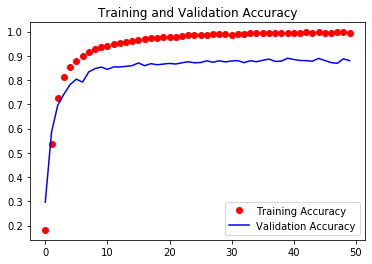

In [37]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

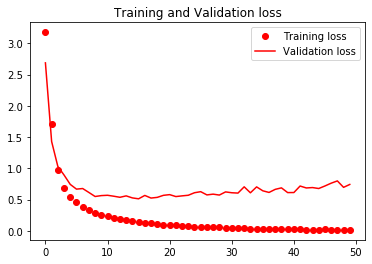

In [38]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [0]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

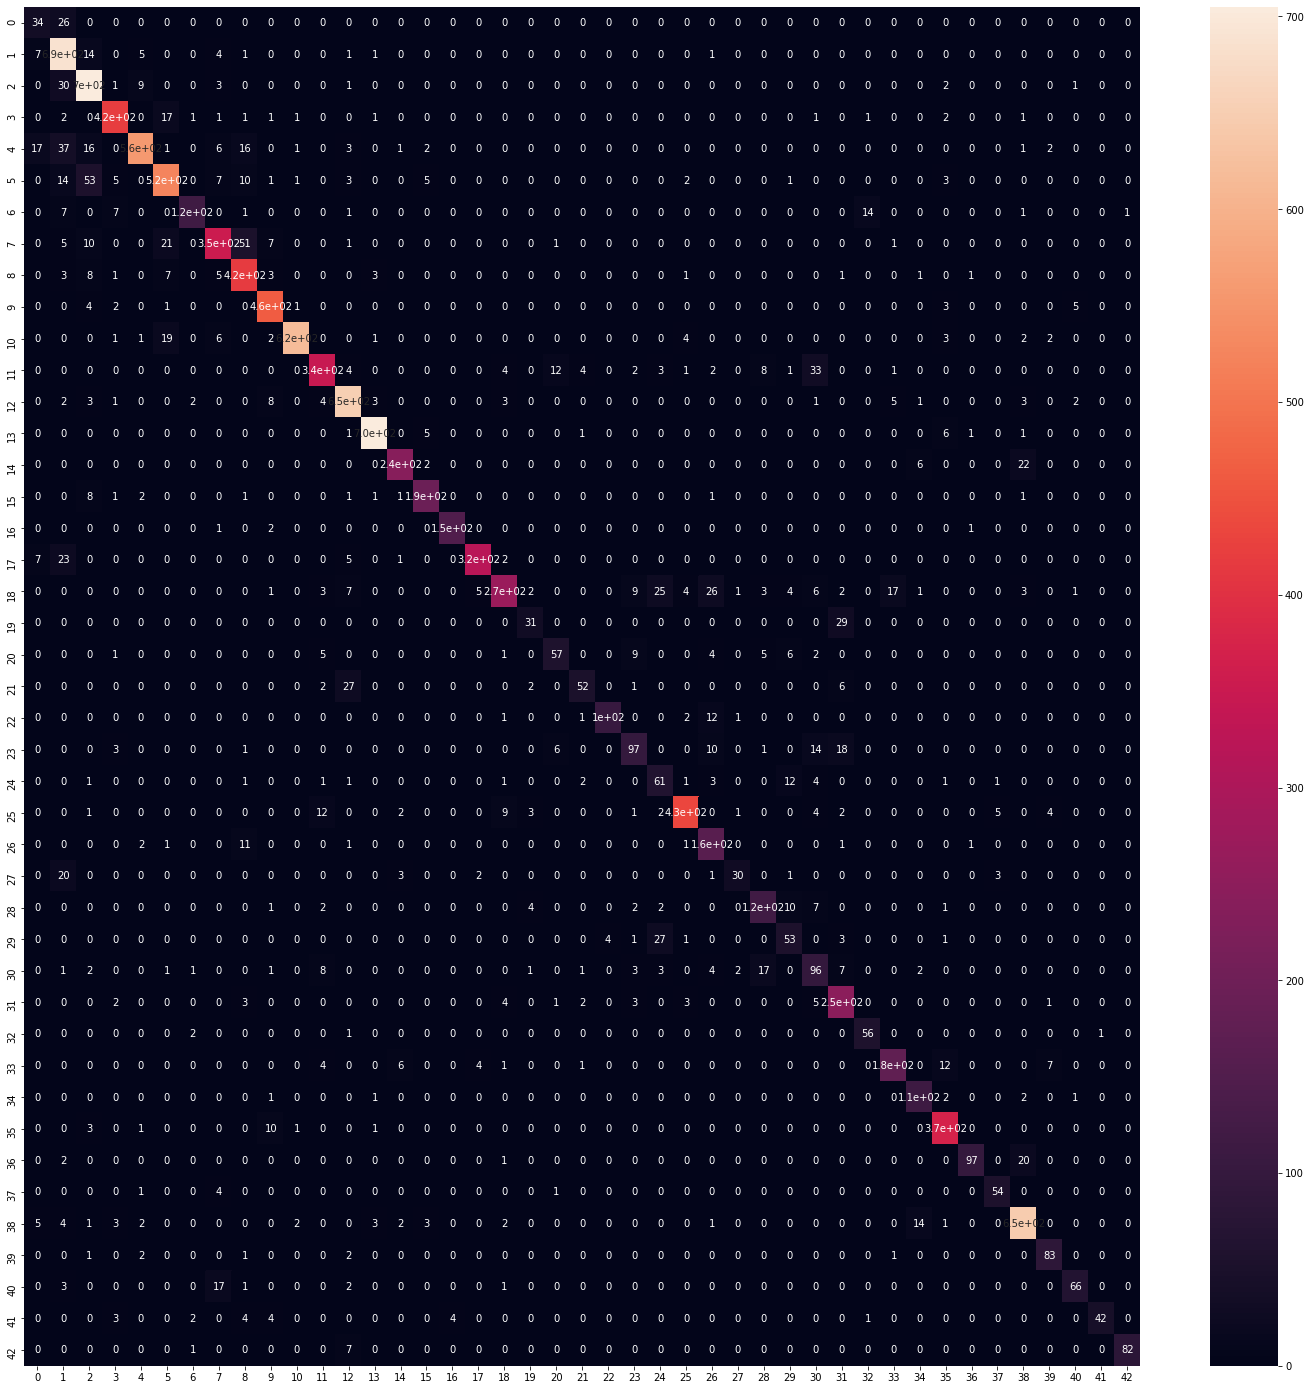

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

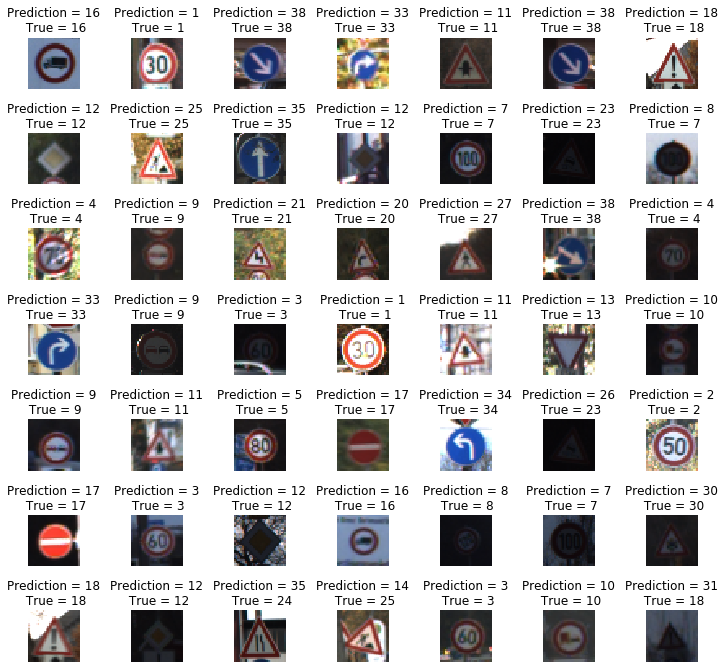

In [41]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    